<a href="https://colab.research.google.com/github/Texugo-928/Santander_ML2/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados Aplicado a Esportes de Luta 🥊🏆

Mixed Martial Arts (MMA) é um esporte de combate popular, e o Ultimate Fighting Championship (UFC) é a principal organização do mundo do MMA.

Este conjunto de dados fornece estatísticas detalhadas dos lutadores do UFC, incluindo informações sobre vitórias, derrotas, empates, atributos físicos, estilo de luta e conquistas na carreira.


>11 colunas: Nome, Apelido, Vitorias, Derrotas, Empates, Altura(cm), Peso(kg), Alcance(cm), Postura, Data_de_nascimento, Golpes significativos desferidos por minuto e Precisão golpe significativo.


Kaggle - UFC Fighters' Statistics Dataset: https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics/

### 🌟 Import bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re
import scipy.stats as stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import sklearn.datasets as skdata

### 🌟 Leitura da Base de dados

In [2]:
#Para quem for abrir no Google Colab descomentar linhas abaixo
from google.colab import drive
drive.mount('/content/drive')

bd_data = 'ufc-fighters-statistics.csv'
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADA - DATA SCIENTIST/Machine Learning II - Projeto Final/' + bd_data)
##dados = dados.drop(dados.columns[0], axis=1) #se for droppar coluna

Mounted at /content/drive


In [3]:
#Para quem for abrir no VSCode descomentar linhas abaixo
#bd_data = 'ufc-fighters-statistics.csv'

#dados = pd.read_csv(bd_data)
##dados = dados.drop(dados.columns[0], axis=1) #se for droppar coluna

### 🌟 Criando funções

In [4]:
# Função que cria data frames com base em índices de colunas

def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [5]:
# Função que renomeia colunas

def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

### 🌟 Análise e Tratamento da Base

In [6]:
dados.head().T

,0,1,2,3,4
name,Rex Richards,Luana Santos,Cortavious Romious,Danny Silva,Angel Pacheco
nickname,NaN,NaN,Are You Not Entertained?,El Puma,NaN
wins,7,6,7,8,7
losses,2,1,2,1,2
draws,0,0,0,0,0
height_cm,195.58,167.64,162.56,180.34,172.72
weight_in_kg,120.2,56.7,61.23,65.77,65.77
reach_in_cm,NaN,170.18,172.72,177.8,177.8
stance,NaN,Orthodox,Southpaw,Switch,Orthodox
date_of_birth,NaN,2000-04-16,1994-01-06,1997-01-30,1992-01-13


In [7]:
dados.shape

(4109, 18)

In [8]:
df_1 = cria_df([0, 12])
df_1.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy'],
      dtype='object')

In [9]:
novos_nomes1 = ['nome','apelido','vitorias','derrotas','empates','altura(cm)','peso(kg)','alcance(cm)','postura','data_de_nascimento','golpes_significativos_desferidos_por_minuto','precisao_golpe_significativo']

renomeia_coluna_df(df_1,novos_nomes1)
df_1.head().T

,0,1,2,3,4
nome,Rex Richards,Luana Santos,Cortavious Romious,Danny Silva,Angel Pacheco
apelido,NaN,NaN,Are You Not Entertained?,El Puma,NaN
vitorias,7,6,7,8,7
derrotas,2,1,2,1,2
empates,0,0,0,0,0
altura(cm),195.58,167.64,162.56,180.34,172.72
peso(kg),120.2,56.7,61.23,65.77,65.77
alcance(cm),NaN,170.18,172.72,177.8,177.8
postura,NaN,Orthodox,Southpaw,Switch,Orthodox
data_de_nascimento,NaN,2000-04-16,1994-01-06,1997-01-30,1992-01-13


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   nome                                         4109 non-null   object 
 1   apelido                                      2255 non-null   object 
 2   vitorias                                     4109 non-null   int64  
 3   derrotas                                     4109 non-null   int64  
 4   empates                                      4109 non-null   int64  
 5   altura(cm)                                   3812 non-null   float64
 6   peso(kg)                                     4022 non-null   float64
 7   alcance(cm)                                  2183 non-null   float64
 8   postura                                      3287 non-null   object 
 9   data_de_nascimento                           2975 non-null   object 
 10  

In [11]:
df_1.isnull().sum()

nome                                              0
apelido                                        1854
vitorias                                          0
derrotas                                          0
empates                                           0
altura(cm)                                      297
peso(kg)                                         87
alcance(cm)                                    1926
postura                                         822
data_de_nascimento                             1134
golpes_significativos_desferidos_por_minuto       0
precisao_golpe_significativo                      0
dtype: int64

In [12]:
df_1.describe()

,vitorias,derrotas,empates,altura(cm),peso(kg),alcance(cm),golpes_significativos_desferidos_por_minuto,precisao_golpe_significativo
count,4109.000000,4109.000000,4109.000000,3812.000000,4022.000000,2183.000000,4109.000000,4109.000000
mean,12.360672,5.722073,0.264298,178.234439,77.395405,181.803729,2.442100,35.553906
std,9.376023,5.104569,0.822483,8.889213,17.988389,10.679990,1.996586,20.405083
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000
50%,11.000000,4.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000


In [13]:
num_unique_values = df_1.nunique()

# Cria novo DataFrame com valores unicos
unique_values_df = pd.DataFrame({'Coluna': num_unique_values.index, 'Valores Únicos': num_unique_values.values})

print(unique_values_df)

                                         Coluna  Valores Únicos
0                                          nome            4103
1                                       apelido            1783
2                                      vitorias              57
3                                      derrotas              40
4                                       empates              12
5                                    altura(cm)              26
6                                      peso(kg)             112
7                                   alcance(cm)              27
8                                       postura               5
9                            data_de_nascimento            2564
10  golpes_significativos_desferidos_por_minuto             702
11                 precisao_golpe_significativo              83


1) Tratando colunas vazias


In [14]:
#Preenchendo os vazios da coluna "apelido" com os dados da coluna "nome"

df_1.loc[(df_1["apelido"].isnull()), "apelido"] = df_1["nome"]

In [15]:
#Cálculo da média das alturas para preencher os valores vazios

media_altura = round(df_1['altura(cm)'].mean(), 2)
desvio_padrao_altura = round(df_1['altura(cm)'].std(), 2)

print(f'Média da altura: {media_altura}cm')
print(f'Desvio padrão da altura: {desvio_padrao_altura}cm')

Média da altura: 178.23cm
Desvio padrão da altura: 8.89cm


In [16]:
#Preenchendo os vazios da coluna "altura(cm)" a média da coluna

df_1.loc[(df_1["altura(cm)"].isnull()), "altura(cm)"] = media_altura

In [17]:
#Cálculo da média dos pesos para preencher os valores vazios

media_peso = round(df_1['peso(kg)'].mean(), 2)
desvio_padrao_peso = round(df_1['peso(kg)'].std(), 2)

print(f'Média do peso: {media_peso}kg')
print(f'Desvio padrão do peso: {desvio_padrao_peso}kg')

Média do peso: 77.4kg
Desvio padrão do peso: 17.99kg


In [18]:
#Preenchendo os vazios da coluna "peso(kg)" a média da coluna

df_1.loc[(df_1["peso(kg)"].isnull()), "peso(kg)"] = media_peso

In [19]:
#Cálculo da média do alcance para preencher os valores vazios

media_alcance = round(df_1['alcance(cm)'].mean(), 2)
desvio_padrao_alcance = round(df_1['alcance(cm)'].std(), 2)

print(f'Média do alcance: {media_alcance}cm')
print(f'Desvio padrão do alcance: {desvio_padrao_alcance}cm')

Média do alcance: 181.8cm
Desvio padrão do alcance: 10.68cm


In [20]:
#Preenchendo os vazios da coluna "alcance(cm)" a média da coluna

df_1.loc[(df_1["alcance(cm)"].isnull()), "alcance(cm)"] = media_alcance

In [21]:
# Dividir a coluna "data_de_nascimento" em novas colunas "dia", "mes" e "ano"

df_1[['ano', 'mes', 'dia']] = df_1['data_de_nascimento'].str.split('-', expand=True)

In [22]:
# Converte a coluna 'ano', 'mes' e 'dia' para numérica
###errors='coerce' é usado para substituir valores que não podem ser convertidos para NaN###

df_1['ano'] = pd.to_numeric(df_1['ano'], errors='coerce')
df_1['mes'] = pd.to_numeric(df_1['mes'], errors='coerce')
df_1['dia'] = pd.to_numeric(df_1['dia'], errors='coerce')

# Calculo da média desconsiderando os valores vazios
media_ano = int(df_1['ano'].mean(skipna=True))
desvio_padrao_ano = round(df_1['ano'].std(skipna=True), 2)

print(f'Média da coluna "ano": {media_ano}')
print(f'Desvio padrão do "ano": {desvio_padrao_ano}')

Média da coluna "ano": 1985
Desvio padrão do "ano": 7.78


In [23]:
#Preenchendo os NaN da coluna "ano" a média da coluna

df_1['ano'] = df_1['ano'].fillna(media_ano).astype(int)

In [24]:
#Incluindo uma coluna com a idade

df_1['idade'] = 2023 - df_1['ano']

2) Renomeando informações

In [25]:
df_1["postura"].unique()

array([nan, 'Orthodox', 'Southpaw', 'Switch', 'Open Stance', 'Sideways'],
      dtype=object)

In [26]:
#Renomeando a coluna "postura" para português

df_1.loc[(df_1["postura"]=='Orthodox', "postura")] = "Ortodoxo(destro)"
df_1.loc[(df_1["postura"]=='Southpaw', "postura")] = "Canhoto"
df_1.loc[(df_1["postura"]=='Switch', "postura")] = "Switch(troca)"
df_1.loc[(df_1["postura"]=='Open Stance', "postura")] = "Postura Aberta"
df_1.loc[(df_1["postura"]=='Sideways', "postura")] = "Lateral"
df_1.loc[((df_1["postura"].isnull()), "postura")] = "Não Informado"

3) Criando Dataframes Finais + Testes

In [27]:
#Primeiro Dataframe tratado (sem as colunas 'nome', 'apelido', 'data de nascimento', 'ano', 'mes' e 'dia')
df_tratado = df_1.drop(['nome','apelido','data_de_nascimento', 'ano', 'mes', 'dia'], axis=1).copy()

#Segundo Dataframe tratado (sem 'data de nascimento', 'ano', 'mes' e 'dia')
df_tratado_com_nomes = df_1.drop(['data_de_nascimento', 'ano', 'mes', 'dia'], axis=1).copy()

#Terceiro Dataframe apenas com atributos fisicos e de performance
df_tratado_atributos = df_1.drop(['nome','apelido','postura','golpes_significativos_desferidos_por_minuto','precisao_golpe_significativo','data_de_nascimento', 'ano', 'mes', 'dia'], axis=1).copy()


In [28]:
#df_tratado.isnull().sum()

### 🌟 Análise Exploratória

1) Distribuição da Base por nível de experiencia


In [29]:
df_tratado_com_nomes.head().T

,0,1,2,3,4
nome,Rex Richards,Luana Santos,Cortavious Romious,Danny Silva,Angel Pacheco
apelido,Rex Richards,Luana Santos,Are You Not Entertained?,El Puma,Angel Pacheco
vitorias,7,6,7,8,7
derrotas,2,1,2,1,2
empates,0,0,0,0,0
altura(cm),195.58,167.64,162.56,180.34,172.72
peso(kg),120.2,56.7,61.23,65.77,65.77
alcance(cm),181.8,170.18,172.72,177.8,177.8
postura,Não Informado,Ortodoxo(destro),Canhoto,Switch(troca),Ortodoxo(destro)
golpes_significativos_desferidos_por_minuto,17.65,17.1,14.48,13.6,13.13


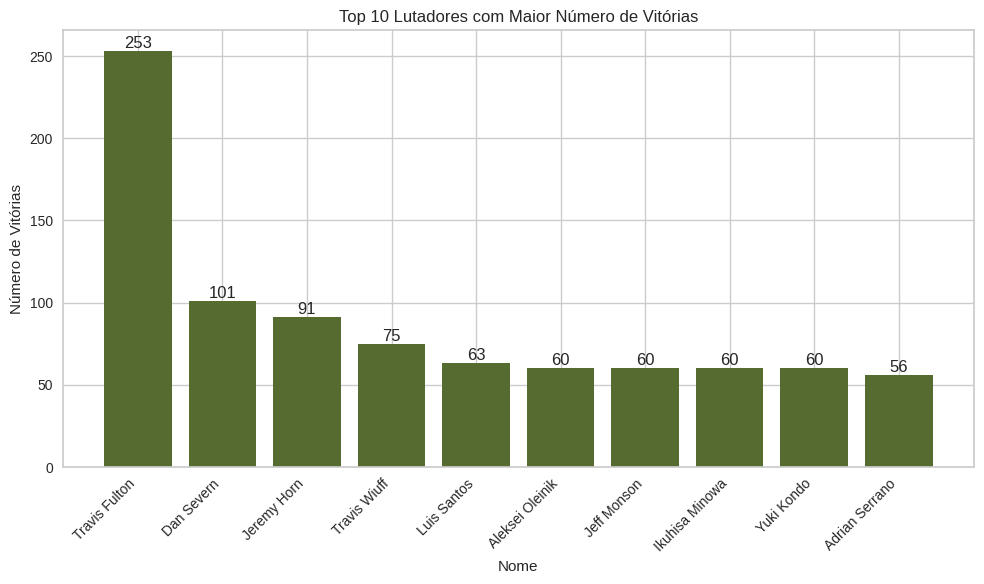

In [30]:
# DataFrame classificado pelo número de vitórias em ordem decrescente
df_sorted = df_tratado_com_nomes.sort_values(by='vitorias', ascending=False)
top_10 = df_sorted.head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10['nome'], top_10['vitorias'], color='#556B2F')
plt.xlabel('Nome')
plt.ylabel('Número de Vitórias')
plt.title('Top 10 Lutadores com Maior Número de Vitórias')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos para melhor legibilidade

# Adiciona os números em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout();

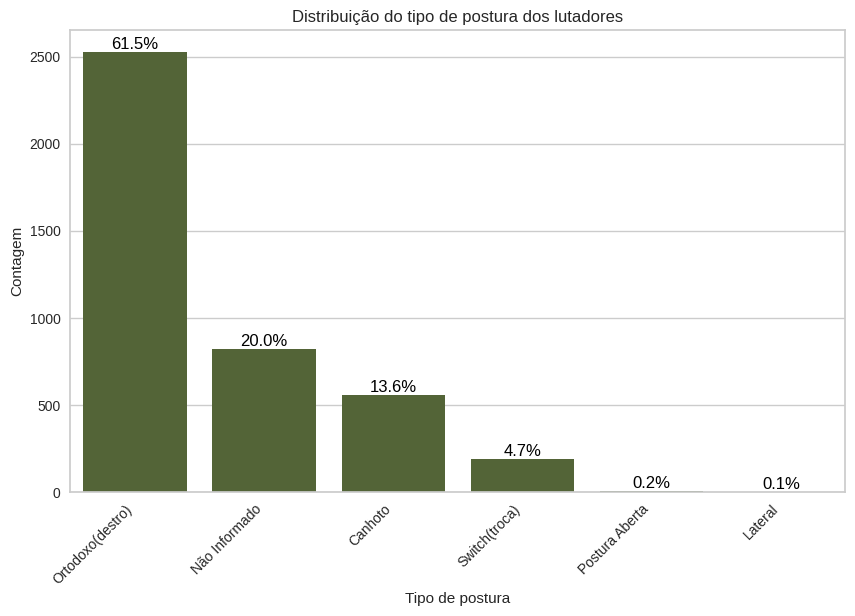

In [46]:
ordem_posturas = ['Ortodoxo(destro)','Não Informado','Canhoto', 'Switch(troca)', 'Postura Aberta', 'Lateral']

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_1, x='postura', color='#556B2F', order=ordem_posturas)

# Porcentagens ao eixo y
total = float(len(df_1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height/total:.1%}', ha="center", va="bottom", fontsize=12, color='black')

plt.title('Distribuição do tipo de postura dos lutadores')
plt.xlabel('Tipo de postura')
plt.ylabel('Contagem')

# Inclina os rótulos
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [32]:
df_agrupado = df_1.groupby('postura').agg({
    'vitorias': 'sum',
    'derrotas': 'sum',
    'empates': 'sum'
}).reset_index()

# Novo DataFrame consolidado
df_consolidado = pd.DataFrame({
    'postura': df_agrupado['postura'],
    'total_vitorias': df_agrupado['vitorias'],
    'total_derrotas': df_agrupado['derrotas'],
    'total_empates': df_agrupado['empates'],
})

print(df_consolidado)

            postura  total_vitorias  total_derrotas  total_empates
0           Canhoto            8187            3547            225
1           Lateral               6               5              0
2     Não Informado            6404            3917            121
3  Ortodoxo(destro)           33884           15157            702
4    Postura Aberta             107              69              3
5     Switch(troca)            2202             817             35


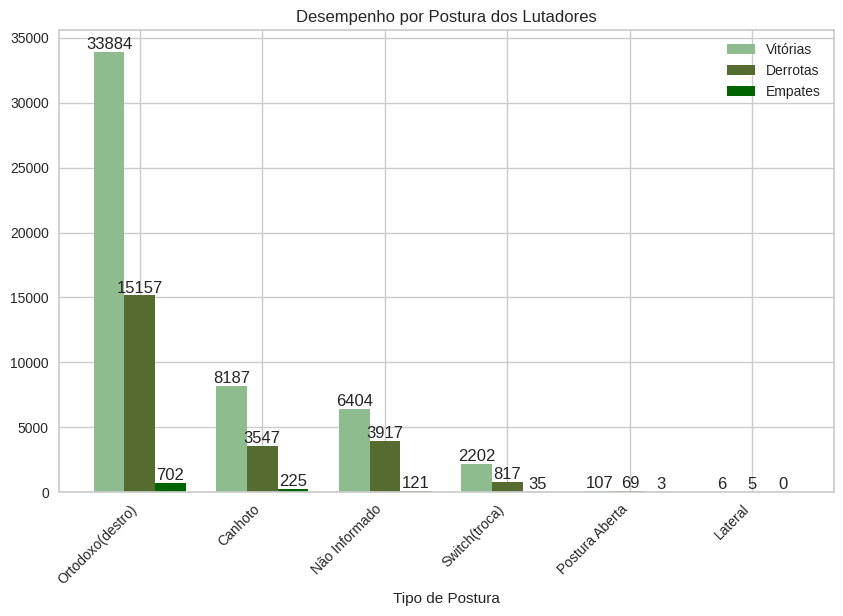

In [43]:
ordem_posturas2 = ['Ortodoxo(destro)', 'Canhoto', 'Não Informado', 'Switch(troca)', 'Postura Aberta', 'Lateral']

# Ordene o DataFrame consolidado ordenado pela ordem_posturas2
df_consolidado = df_consolidado.set_index('postura').loc[ordem_posturas2].reset_index()

# Configuração do gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.25  # Largura da barra

# Posições para as barras de vitórias, derrotas e empates
pos_vitorias = np.arange(len(df_consolidado))
pos_derrotas = pos_vitorias + bar_width
pos_empates = pos_derrotas + bar_width

# Criando as barras para vitórias, derrotas e empates
plt.bar(pos_vitorias, df_consolidado['total_vitorias'], width=bar_width, color='#8FBC8F', label='Vitórias')
plt.bar(pos_derrotas, df_consolidado['total_derrotas'], width=bar_width, color='#556B2F', label='Derrotas')
plt.bar(pos_empates, df_consolidado['total_empates'], width=bar_width, color='#006400', label='Empates')

# Adiciona os números em cima das barras
for i, value in enumerate(df_consolidado['total_vitorias']):
    plt.text(pos_vitorias[i], value, str(value), ha='center', va='bottom')

for i, value in enumerate(df_consolidado['total_derrotas']):
    plt.text(pos_derrotas[i], value, str(value), ha='center', va='bottom')

for i, value in enumerate(df_consolidado['total_empates']):
    plt.text(pos_empates[i], value, str(value), ha='center', va='bottom')

# Configurações adicionais
plt.title('Desempenho por Postura dos Lutadores')
plt.xlabel('Tipo de Postura')
plt.ylabel('')
plt.xticks(pos_vitorias + bar_width, df_consolidado['postura'])  # Adicione os rótulos do eixo x
plt.legend()

# Inclinar os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.show()

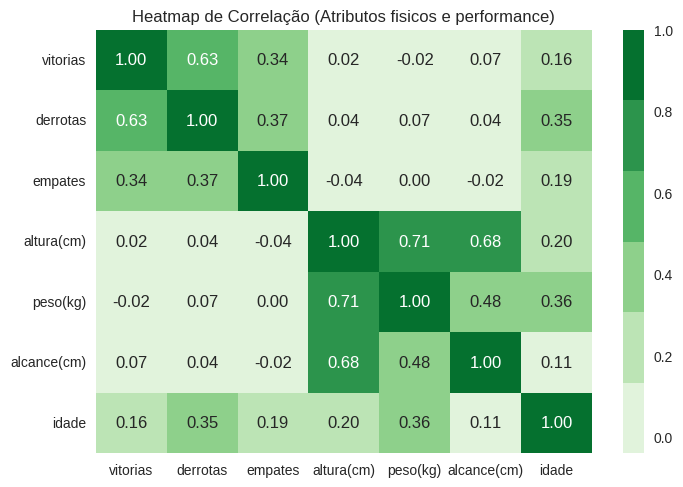

In [34]:
sns.heatmap(df_tratado_atributos.corr(), annot=True, cmap=sns.color_palette("Greens"), fmt=".2f")

plt.title('Heatmap de Correlação (Atributos fisicos e performance)')
plt.show()

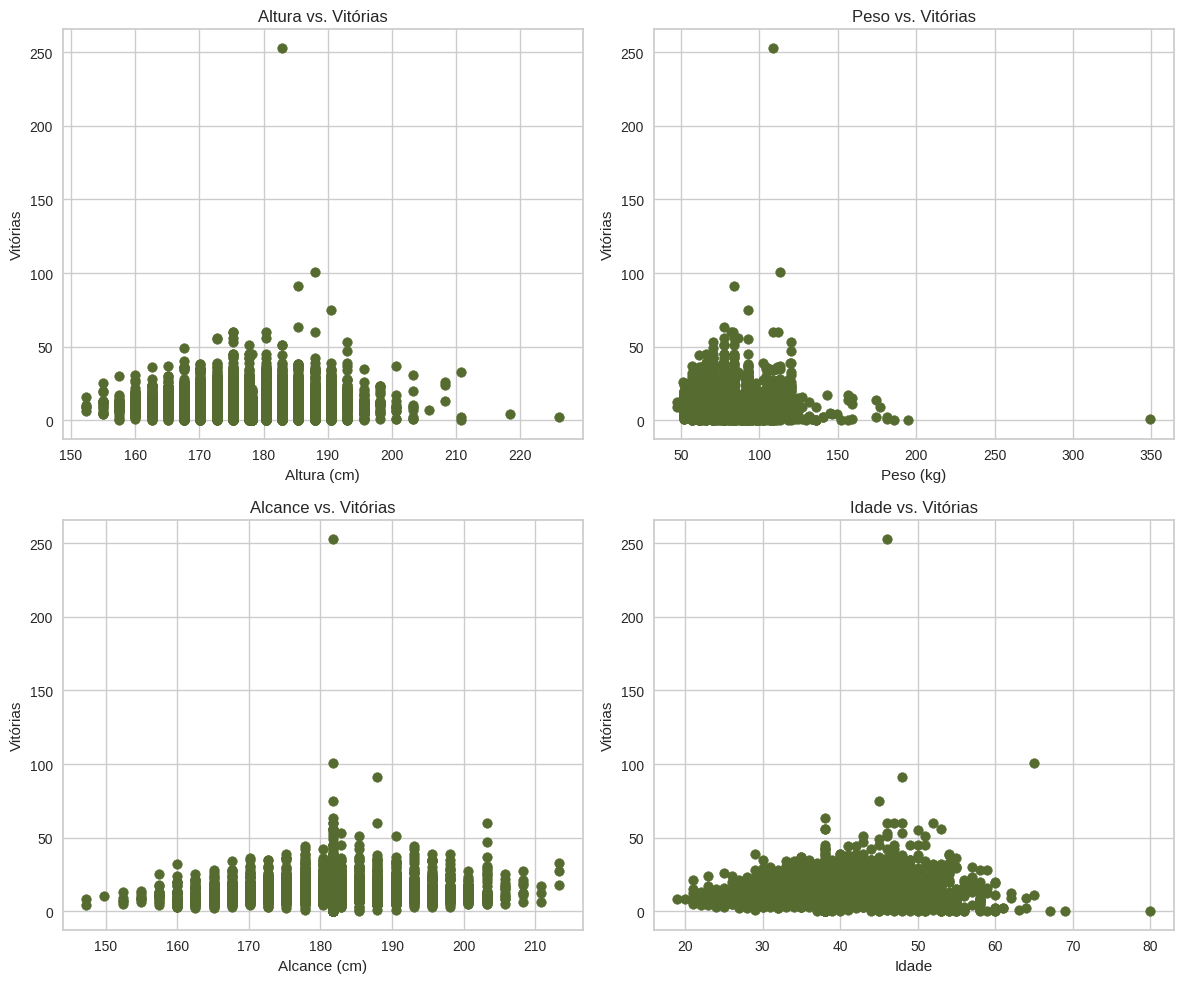

In [35]:
plt.figure(figsize=(12, 10))

# Dados do gráfico de altura
altura = df_tratado['altura(cm)']
vitorias = df_tratado['vitorias']

# Subplot 1
plt.subplot(2, 2, 1)
plt.scatter(altura, vitorias, color='#556B2F')
plt.xlabel('Altura (cm)')
plt.ylabel('Vitórias')
plt.title('Altura vs. Vitórias')

# Dados do gráfico de peso
peso = df_tratado['peso(kg)']

# Subplot 2
plt.subplot(2, 2, 2)
plt.scatter(peso, vitorias, color='#556B2F')
plt.xlabel('Peso (kg)')
plt.ylabel('Vitórias')
plt.title('Peso vs. Vitórias')

# Dados do gráfico de alcance
alcance = df_tratado['alcance(cm)']

# Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(alcance, vitorias, color='#556B2F')
plt.xlabel('Alcance (cm)')
plt.ylabel('Vitórias')
plt.title('Alcance vs. Vitórias')

# Dados do gráfico de idade
idade = df_tratado['idade']

# Subplot 4
plt.subplot(2, 2, 4)
plt.scatter(idade, vitorias, color='#556B2F')
plt.xlabel('Idade')
plt.ylabel('Vitórias')
plt.title('Idade vs. Vitórias')

# Evitar sobreposição
plt.tight_layout();

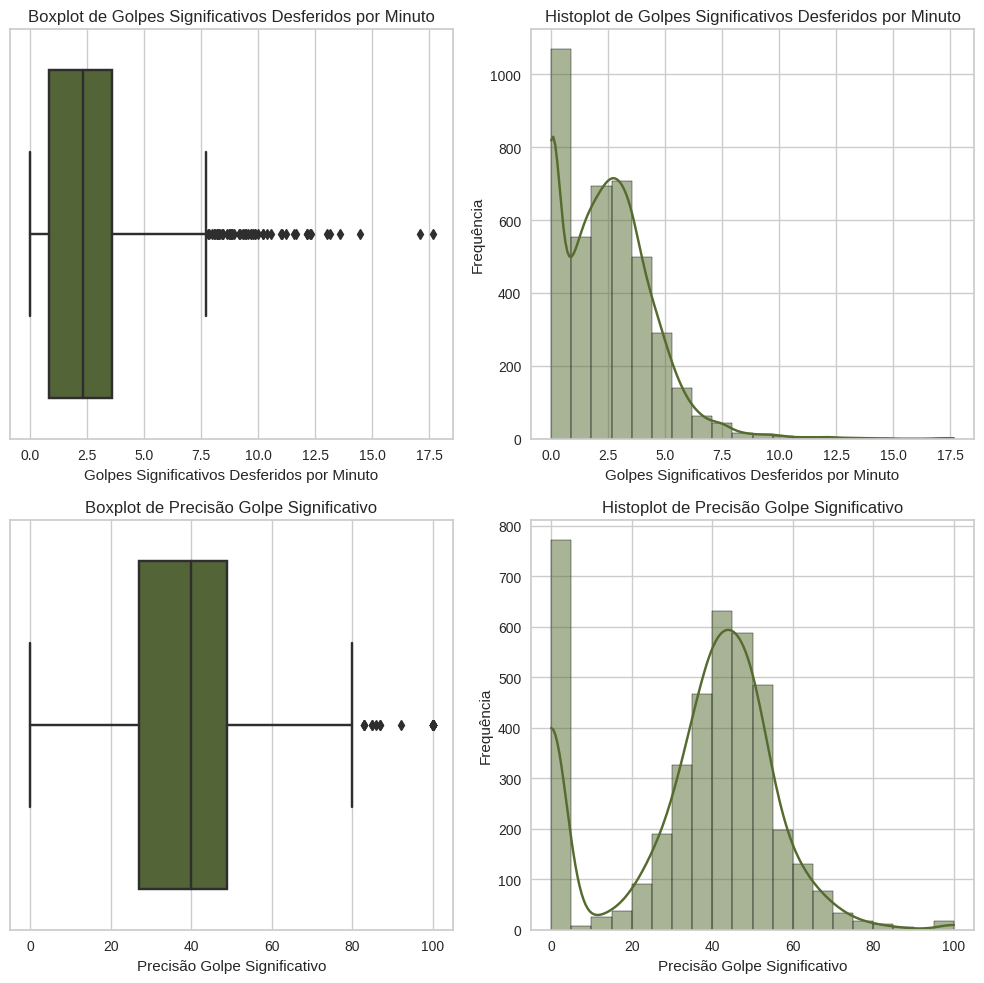

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot e Histoplot para "golpes_significativos_desferidos_por_minuto"
sns.boxplot(x=df_tratado['golpes_significativos_desferidos_por_minuto'], ax=axs[0, 0], color='#556B2F')
axs[0, 0].set(xlabel='Golpes Significativos Desferidos por Minuto', title='Boxplot de Golpes Significativos Desferidos por Minuto')

sns.histplot(df_tratado['golpes_significativos_desferidos_por_minuto'], bins=20, kde=True, color='#556B2F', ax=axs[0, 1])
axs[0, 1].set(xlabel='Golpes Significativos Desferidos por Minuto', ylabel='Frequência', title='Histoplot de Golpes Significativos Desferidos por Minuto')

# Boxplot e Histoplot para "precisao_golpe_significativo"
sns.boxplot(x=df_tratado['precisao_golpe_significativo'], ax=axs[1, 0], color='#556B2F')
axs[1, 0].set(xlabel='Precisão Golpe Significativo', title='Boxplot de Precisão Golpe Significativo')

sns.histplot(df_tratado['precisao_golpe_significativo'], bins=20, kde=True, color='#556B2F', ax=axs[1, 1])
axs[1, 1].set(xlabel='Precisão Golpe Significativo', ylabel='Frequência', title='Histoplot de Precisão Golpe Significativo')

# Evitar sobreposição
plt.tight_layout();

### 🌟 K-Means - Método do Cotovelo (Elbow Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

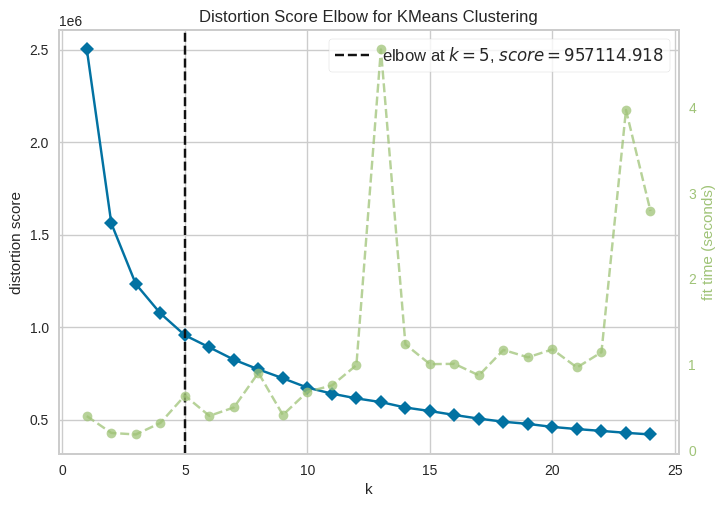

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Instancia o modelo
model = KMeans()

# Instancia o visualizador
visualizer = KElbowVisualizer(model,       # o modelo K-means a ser utilizado
                              k = (1, 25))  # Faixa de valores para o K

# Fit do Visualizador
visualizer.fit(df_tratado_atributos)

# Mostra o gráfico
visualizer.show()

In [50]:
model = KMeans(n_clusters = 5,    # Define o número de clusters a ser utilizados
               random_state = 42) # Define a Semente Aleatória

# Treinamento do K-Means
model.fit(df_tratado_atributos)

# Definindo os clusters
clusters = model.predict(df_tratado_atributos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 🌟 K-Means - Método da Silhueta (Silhouette Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

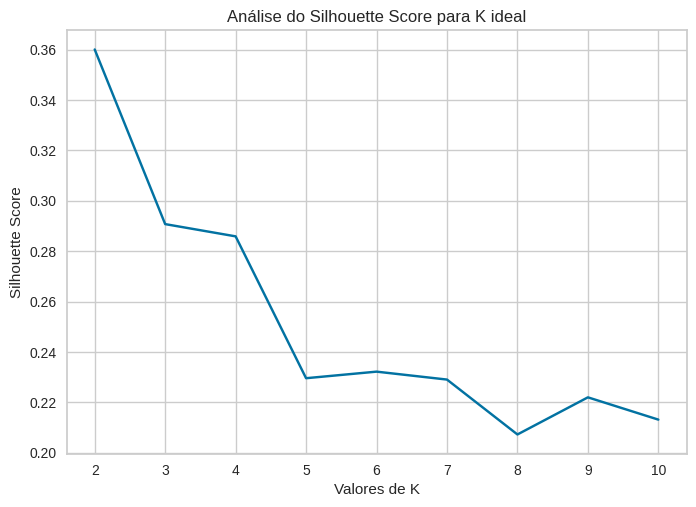

In [53]:
scores = []
X = df_tratado_atributos

# Determina o tamanho da faixa de testes
range_clusters = range(2, 11)

# Processo iterativo para determinar os scores
for n in range_clusters:

    # Instancia o modelo
    kmeans = KMeans(n_clusters = n, random_state = 42)

    # Fit do modelo
    kmeans.fit(X)

    # Determina as labels dos clusters
    clusters = kmeans.labels_

    # Calcula o score e anexa na lista
    scores.append(silhouette_score(X, clusters))

# Cria o gráfico dos scores pelos valores de K
plt.plot(range_clusters, scores, 'bx-')

# Atribui um nome ao eixo X
plt.xlabel('Valores de K')

# Atribui o nome ao eixo Y
plt.ylabel('Silhouette Score')

# Adiciona um título
plt.title('Análise do Silhouette Score para K ideal')

# Mostra o gráfico
plt.show()

### 🌟 DBSCAN

In [54]:
n_samples =1000

# Definindo o conjunto de dados original
X = df_tratado_atributos[0]
labels = df_tratado_atributos[1]

# Gráfico com os dados originais
plt.title("Conjunto Original")
plt.scatter(X[:, 0], X[:, 1], c=df_tratado_atributos[1], cmap='viridis')
plt.show()


# Definindo o MinPts e epsilon
# MinPts igual ao dobro de atributos, neste caso igual a 4
MinPts = 4

# Instancia o modelo com o número de vizinhos igual ao MinPts
neighbors = NearestNeighbors(n_neighbors = MinPts)

# Treina o modelo
neighbors_fit = neighbors.fit(X)

# Devolve os valores de distância e índices
distances, indices = neighbors_fit.kneighbors(X)

# Ordena as distâncias
distances = np.sort(distances, axis = 0)

# Cria o gráfico
plt.plot(distances[:, 1])

# Cria o nome do eixo X
plt.xlabel("Valor da Distância K")

# Cria o nome do eixo X
plt.ylabel("Valor epsilon")

# Mostra o gráfico
plt.show()

# o valor de epsilon a ser utilizado seria algo em torno do 0,1 de acordo com o gráfico
epsilon = 0.1

# Criando o gráfico para o DBSCAN e comparando com o K-Means
# Definindo o tamanho da janela de gráficos
plt.figure(figsize = (15, 5))

# Criando o K-Means
# número de clusters
k = 2

# Instancia o modelo Kmeans
kmeans = KMeans(n_clusters = k)

# Treina o modelo
kmeans.fit(X)

# Define os clusters para o KMeans
labels_kmeans = kmeans.fit_predict(X)

# Define os centroides
centers = kmeans.cluster_centers_

# Mostra o primeiro gráfico
plt.subplot(1, 2, 1)

# Cria o gráfico para os pontos do KMeans
plt.scatter(X[:, 0], X[:, 1], c = labels_kmeans, cmap = 'viridis')

# Cria os centroides no gráfico
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')

# Título do Gráfico
plt.title('K-Means')

# Criando agora para o DBSCAN
# Instancia o modelo com o valor de epsilon e MinPts
model = DBSCAN(eps = epsilon, min_samples = MinPts).fit(X)

# Define os clusters
clusters = model.labels_


# Mostra o segundo gráfico
plt.subplot(1, 2, 2)

# Cria o gráfico do DBSCAN
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap='viridis')

# cria um título
plt.title('DBSCAN')

# Mostra os gráficos
plt.show()


KeyError: ignored

### 🌟 Agrupamento Hierárquico